In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-census/india-districts-census-2011.csv
/kaggle/input/india-census/india_census_housing-hlpca-full.csv
/kaggle/input/india-census/hlpca-colnames.csv


In [2]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/kaggle/input/india-census/india-districts-census-2011.csv")
print(df.shape)
df.head()

(640, 118)


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [4]:
df.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [5]:
fig = px.histogram(df, x = "State name", y = "Population")
fig.update_layout(bargap = 0.1)
fig.show()

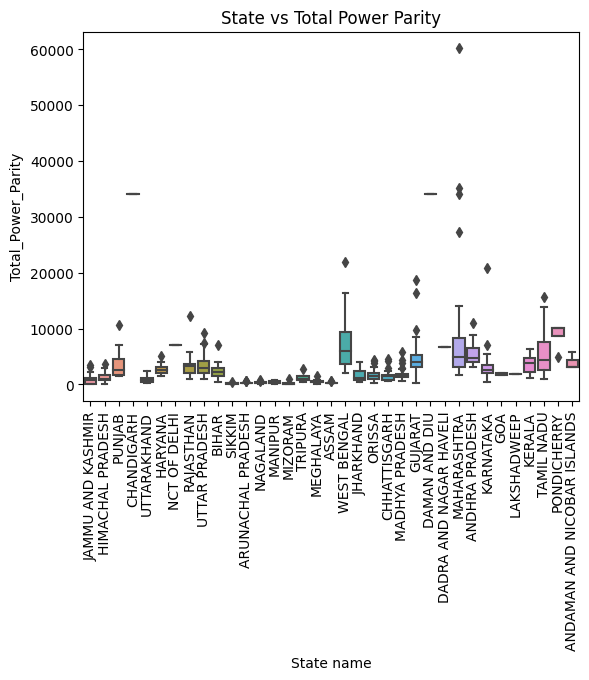

In [6]:
plt.figure()
sns.boxplot(df, x = "State name", y = "Total_Power_Parity")
plt.title("State vs Total Power Parity")
plt.xticks(rotation=90)
plt.show()

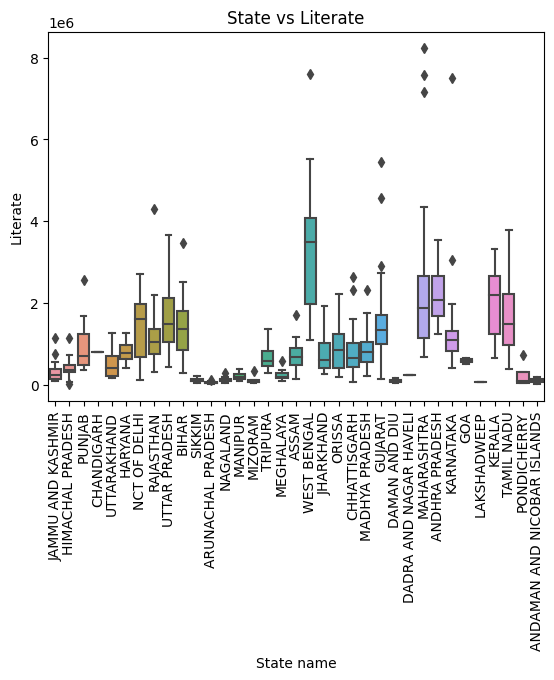

In [7]:
plt.figure()
sns.boxplot(df, x = "State name", y = "Literate")
plt.xticks(rotation=90)
plt.title("State vs Literate")
plt.show()

In [8]:
selected_df = df[["Population", "Literate", "Workers", "Total_Education", "Urban_Households", "Rural_Households", "Age_Group_0_29", "Age_Group_30_49", "Age_Group_50", "Total_Power_Parity" ]]
selected_df

,Population,Literate,Workers,Total_Education,Urban_Households,Rural_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Total_Power_Parity
0,870354,439654,229064,694780,23226,158438,600759,178435,89679,1119
1,753745,335649,214866,717618,27190,160649,503223,160933,88978,1066
2,133487,93770,75079,108130,17474,36920,70703,41515,21019,242
3,140802,86236,51873,122792,7774,40370,87532,35561,17488,214
4,476835,261724,161393,452474,15269,132139,304979,109818,61334,629
...,...,...,...,...,...,...,...,...,...,...
635,41816,36470,11802,39851,12110,0,19760,12543,9428,10027
636,200222,154916,68301,187278,33715,35618,102333,60089,37434,4890
637,36842,25332,17125,37527,0,15958,18786,12088,5922,3151
638,105597,78683,38579,109747,1094,39091,57350,30741,17464,3151


Text(0.5, 1.0, 'Coorelation Matrix')

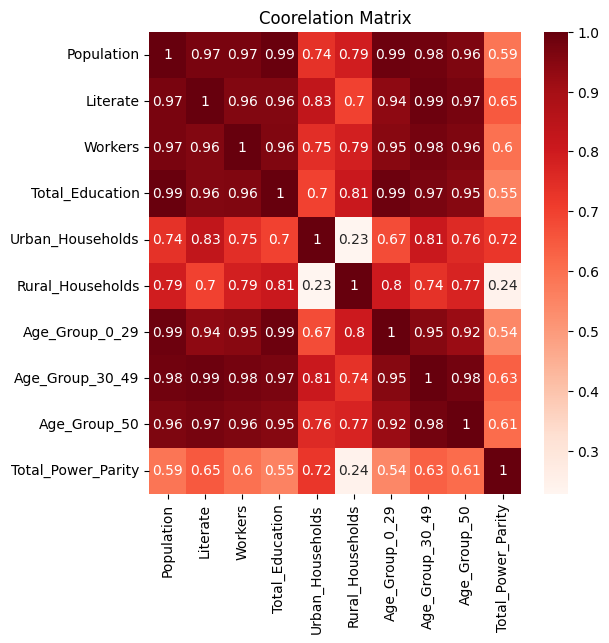

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(selected_df.corr(), cmap="Reds", annot=True)
plt.title("Coorelation Matrix")

In [10]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(selected_df),columns = selected_df.columns)
scaled_df

,Population,Literate,Workers,Total_Education,Urban_Households,Rural_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Total_Power_Parity
0,-0.662017,-0.705721,-0.863521,-0.767660,-0.491293,-0.718677,-0.565360,-0.726284,-0.825972,-0.473881
1,-0.737581,-0.803127,-0.886923,-0.752534,-0.478211,-0.710153,-0.675192,-0.768155,-0.828723,-0.485316
2,-1.139518,-1.029659,-1.117333,-1.156206,-0.510275,-1.187200,-1.162237,-1.053847,-1.095484,-0.663096
3,-1.134778,-1.036715,-1.155584,-1.146495,-0.542287,-1.173898,-1.143286,-1.068091,-1.109345,-0.669137
4,-0.917023,-0.872361,-0.975062,-0.928142,-0.517552,-0.820075,-0.898427,-0.890441,-0.937235,-0.579600
...,...,...,...,...,...,...,...,...,...,...
635,-1.198922,-1.083323,-1.221632,-1.201428,-0.527978,-1.329548,-1.219602,-1.123159,-1.140983,1.448041
636,-1.096273,-0.972393,-1.128505,-1.103785,-0.456677,-1.192220,-1.126620,-1.009411,-1.031050,0.339721
637,-1.202146,-1.093755,-1.212859,-1.202967,-0.567943,-1.268020,-1.220699,-1.124247,-1.154745,-0.035472
638,-1.157591,-1.043789,-1.177496,-1.155135,-0.564333,-1.178829,-1.177273,-1.079622,-1.109439,-0.035472


In [13]:
final_df = pd.DataFrame()
final_df["State name"] = LabelEncoder().fit_transform(df["State name"])
final_df["District name"] = LabelEncoder().fit_transform(df["District name"])
final_df[scaled_df.columns] = scaled_df
final_df


,State name,District name,Population,Literate,Workers,Total_Education,Urban_Households,Rural_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Total_Power_Parity
0,13,327,-0.662017,-0.705721,-0.863521,-0.767660,-0.491293,-0.718677,-0.565360,-0.726284,-0.825972,-0.473881
1,13,31,-0.737581,-0.803127,-0.886923,-0.752534,-0.478211,-0.710153,-0.675192,-0.768155,-0.828723,-0.485316
2,13,340,-1.139518,-1.029659,-1.117333,-1.156206,-0.510275,-1.187200,-1.162237,-1.053847,-1.095484,-0.663096
3,13,282,-1.134778,-1.036715,-1.155584,-1.146495,-0.542287,-1.173898,-1.143286,-1.068091,-1.109345,-0.669137
4,13,454,-0.917023,-0.872361,-0.975062,-0.928142,-0.517552,-0.820075,-0.898427,-0.890441,-0.937235,-0.579600
...,...,...,...,...,...,...,...,...,...,...,...,...
635,26,355,-1.198922,-1.083323,-1.221632,-1.201428,-0.527978,-1.329548,-1.219602,-1.123159,-1.140983,1.448041
636,26,279,-1.096273,-0.972393,-1.128505,-1.103785,-0.456677,-1.192220,-1.126620,-1.009411,-1.031050,0.339721
637,0,413,-1.202146,-1.093755,-1.212859,-1.202967,-0.567943,-1.268020,-1.220699,-1.124247,-1.154745,-0.035472
638,0,416,-1.157591,-1.043789,-1.177496,-1.155135,-0.564333,-1.178829,-1.177273,-1.079622,-1.109439,-0.035472


Text(0.5, 1.0, 'Distance of different K Values')

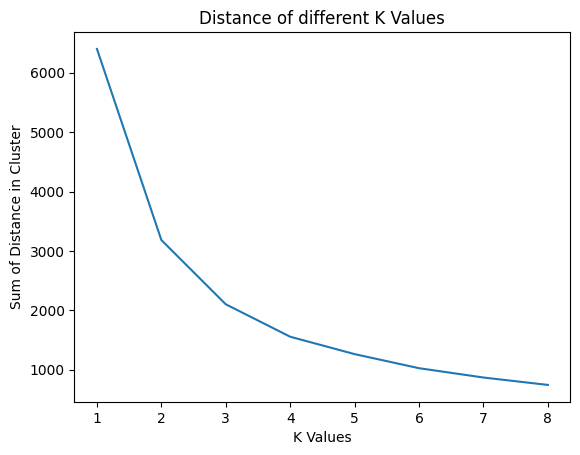

In [17]:
k_values = range(1,9)
inertia_values = []
predicted_score = {}

for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=300, random_state=1)
    kmeansModel.fit(scaled_df)
    inertia_values.append(kmeansModel.inertia_)
    predicted_score[f"kMeans_{k}"] = kmeansModel.score(scaled_df)



plt.plot(k_values, inertia_values)
plt.xlabel("K Values")
plt.ylabel("Sum of Distance in Cluster")
plt.title("Distance of different K Values")

In [18]:
k_values = range(2, 6)
inertia_values = []
predicted_df = scaled_df.copy(deep=False)

for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=100, random_state=1)
    kmeansModel.fit(scaled_df)
    
    predicted_df[f"kMeans_{k}"] = kmeansModel.labels_ 


predicted_df
# predicted_score

,Population,Literate,Workers,Total_Education,Urban_Households,Rural_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Total_Power_Parity,kMeans_2,kMeans_3,kMeans_4,kMeans_5
0,-0.662017,-0.705721,-0.863521,-0.767660,-0.491293,-0.718677,-0.565360,-0.726284,-0.825972,-0.473881,0,0,2,2
1,-0.737581,-0.803127,-0.886923,-0.752534,-0.478211,-0.710153,-0.675192,-0.768155,-0.828723,-0.485316,0,0,2,2
2,-1.139518,-1.029659,-1.117333,-1.156206,-0.510275,-1.187200,-1.162237,-1.053847,-1.095484,-0.663096,0,0,2,2
3,-1.134778,-1.036715,-1.155584,-1.146495,-0.542287,-1.173898,-1.143286,-1.068091,-1.109345,-0.669137,0,0,2,2
4,-0.917023,-0.872361,-0.975062,-0.928142,-0.517552,-0.820075,-0.898427,-0.890441,-0.937235,-0.579600,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-1.198922,-1.083323,-1.221632,-1.201428,-0.527978,-1.329548,-1.219602,-1.123159,-1.140983,1.448041,0,0,2,2
636,-1.096273,-0.972393,-1.128505,-1.103785,-0.456677,-1.192220,-1.126620,-1.009411,-1.031050,0.339721,0,0,2,2
637,-1.202146,-1.093755,-1.212859,-1.202967,-0.567943,-1.268020,-1.220699,-1.124247,-1.154745,-0.035472,0,0,2,2
638,-1.157591,-1.043789,-1.177496,-1.155135,-0.564333,-1.178829,-1.177273,-1.079622,-1.109439,-0.035472,0,0,2,2


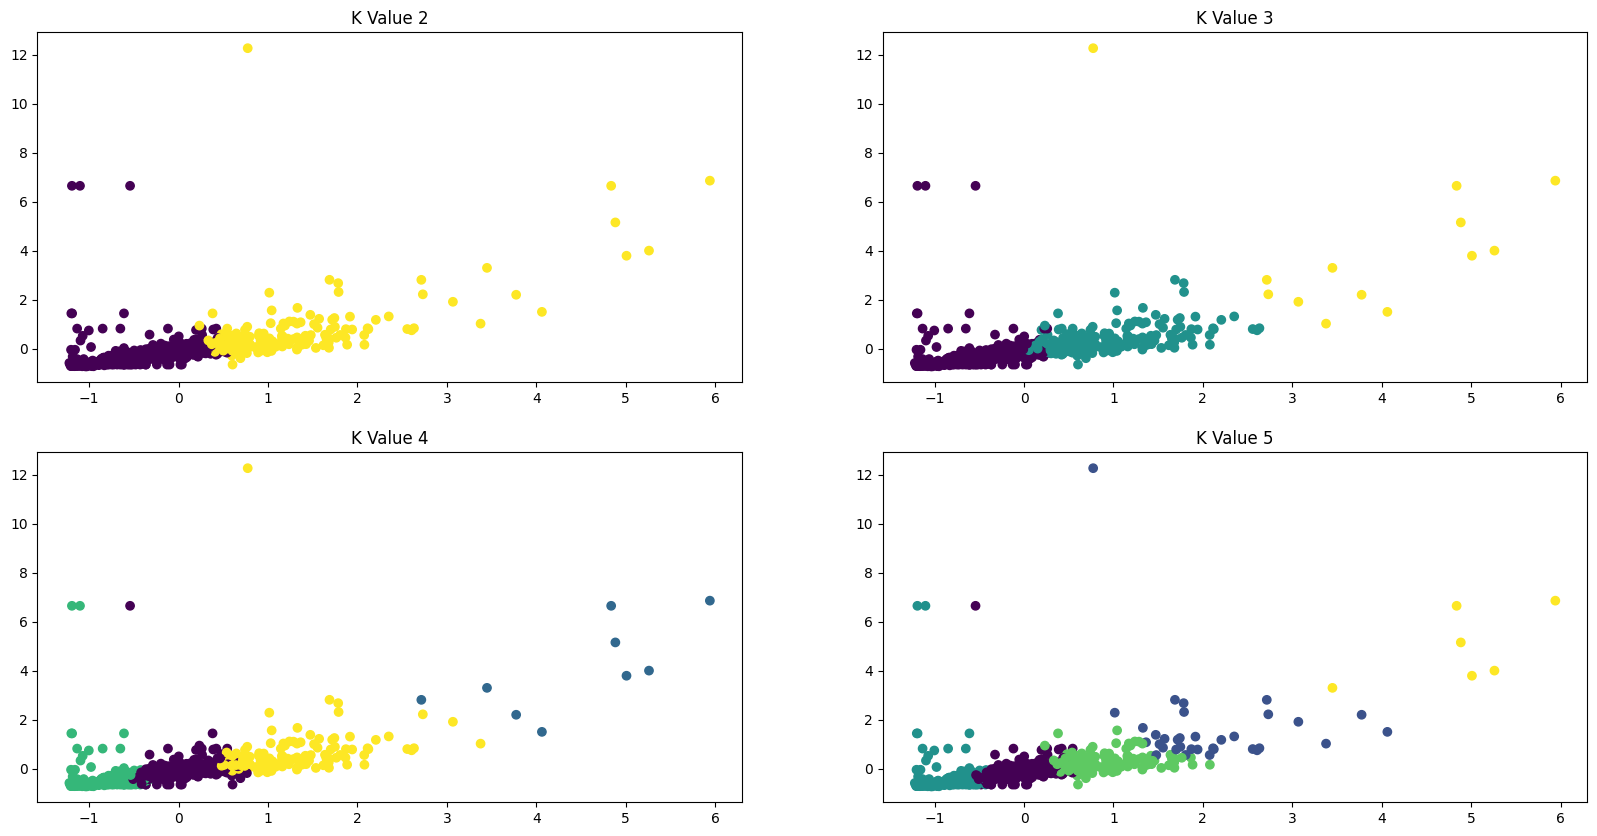

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(x = predicted_df.Population , y = predicted_df.Total_Power_Parity, c = predicted_df[f"kMeans_{i}"])
    ax.set_title(f"K Value {i}")

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(x = predicted_df.Population , y = predicted_df.Total_Education, c = predicted_df[f"kMeans_{i}"])
    ax.set_title(f"K Value {i}")